# Interactive BIANN Visualization Plots for plane wave function

In [4]:
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, fixed, FloatSlider, FloatLogSlider, IntSlider, HBox, Layout, Output, VBox
%matplotlib notebook
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import FloatLogSlider
from ete3 import Tree, NodeStyle, TreeStyle, TextFace, faces, AttrFace
import ete3
import pickle
import matplotlib
from matplotlib import cm
import os

## Load Data for Dynamic Graph

In [5]:
class TreeNode:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None    
    def isLeaf(self):
        if (self.left == None and self.right == None):
            return True
        else:
            return False

In [6]:
container=np.load('plane_wave_data.npz', allow_pickle = True)
boundary = container['boundary']
plot_data = container['plot_data'][()]
tree_data = container['tree_data']

dim = len(boundary[0])

with open('plane_wave_tree.pickle', 'rb') as f:
    index_root = pickle.load(f)

In [7]:
nodes = list(plot_data.keys())
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(plot_data[nodes[0]]['x'].flatten(),plot_data[nodes[0]]['y'].flatten(),plot_data[nodes[0]]['z'].flatten())

<IPython.core.display.Javascript object>

In [173]:
# Initial Process on the plot_data to make it monotonical in x and y directions.
for i in plot_data.keys():
    # print(plot_data[i]['z'].shape)
    plot_data[i]['z'] = np.reshape(plot_data[i]['z'], plot_data[i]['x'].shape)
    plot_data[i]['x'] = plot_data[i]['x'][::2,::2]
    plot_data[i]['y'] = plot_data[i]['y'][::2,::2]
    plot_data[i]['z'] = plot_data[i]['z'][::2,::2]

In [174]:
# from ete3 import Tree, TreeStyle, TextFace, DynamicItemFace, NodeStyle
# from ipywidgets import interact


# class InteractiveItem(QGraphicsRectItem):
#     def __init__(self, *arg, **karg):
#         QGraphicsRectItem.__init__(self, *arg, **karg)
#         self.node = None
#         self.label = None
#         self.setCursor(QtCore.Qt.PointingHandCursor)

#     def hoverEnterEvent (self, e):
#         # There are many ways of adding interactive elements. With the
#         # following code, I show/hide a text item over my custom
#         # DynamicItemFace
#         if not self.label:
#             self.label = QGraphicsRectItem()
#             self.label.setParentItem(self)
#             # This is to ensure that the label is rendered over the
#             # rest of item children (default ZValue for items is 0)
#             self.label.setZValue(1)
#             self.label.setBrush(QBrush(QColor("white")))
#             self.label.text = QGraphicsSimpleTextItem()
#             self.label.text.setParentItem(self.label)

#         self.label.text.setText(self.node.name)
#         self.label.setRect(self.label.text.boundingRect())
#         self.label.setVisible(True)

#     def hoverLeaveEvent(self, e):
#         if self.label:
#             self.label.setVisible(False)

# # Define a function that creates a DynamicItemFace for each node

# def ugly_name_face(node, *args, **kargs):
#     """ This is my item generator. It must receive a node object, and
#     returns a Qt4 graphics item that can be used as a node face.
#     """

#     # receive an arbitrary number of arguments, in this case width and
#     # height of the faces
#     width = args[0]
#     height = args[1]

#     ## Creates a main master Item that will contain all other elements
#     ## Items can be standard QGraphicsItem
#     # masterItem = QGraphicsRectItem(0, 0, width, height)

#     # Or your custom Items, in which you can re-implement interactive
#     # functions, etc. Check QGraphicsItem doc for details.

#     masterItem = InteractiveItem(0, 0, width, height)
#     masterItem.setAcceptHoverEvents(True)
    
#     # Keep a link within the item to access node info
#     masterItem.node = node

#     # I dont want a border around the masterItem
#     masterItem.setPen(QPen(QtCore.Qt.NoPen))

#     # Add ellipse around text
#     ellipse = QGraphicsEllipseItem(masterItem.rect())
#     ellipse.setParentItem(masterItem)
#     # Change ellipse color
#     ellipse.setBrush(QBrush(QColor( random_color())))

#     # Add node name within the ellipse
#     text = QGraphicsSimpleTextItem(node.name)
#     text.setParentItem(ellipse)
#     text.setPen(QPen(QPen(QColor("white"))))

#     # Center text according to masterItem size
#     tw = text.boundingRect().width()
#     th = text.boundingRect().height()
#     center = masterItem.boundingRect().center()
#     text.setPos(center.x()-tw/2, center.y()-th/2)

#     return masterItem

# def create_dynamic_face(node, slider_value):
#     def update_plot(node, *args, **kargs):
#         fig = plt.figure()
#         ax = fig.add_subplot(111, projection='3d')
#         key = nodes[node.name]
#         ax.plot_trisurf(plot_data[key]['x'].flatten(),plot_data[key]['y'].flatten(),plot_data[key]['z'].flatten())
#         return fig

#     dynamic_face = DynamicItemFace(ugly_name_face, 100, 50)
#     return dynamic_face

# # Basic tree style
# ts = TreeStyle()
# ts.show_leaf_name = False
# ts.show_scale = False

# def layout(node, slider_value):
#     dynamic_face = create_dynamic_face(node, slider_value)
#     faces.add_face_to_node(dynamic_face, node, column=0)
    

# # Define a function that updates the tree when the slider value changes
# def update_tree(slider_value):
#     ts.layout_fn = lambda node: layout(node, slider_value)
#     t.render("mytree.png", w=600, tree_style=ts)

# # Create an interactive slider using ipywidgets
# # interact(update_tree, slider_value=(0.0, 10.0, 0.1))

# # Initial render of the tree
# ts.layout_fn = lambda node: layout(node, 5.0)
# t.render("mytree.png", w=600, tree_style=ts)


## Define some functions for the GUI

In [175]:
def traverse(root):
    ret = []
    if root:
        ret = traverse(root.left)
        ret.append(root)
        ret = ret + traverse(root.right)
    return ret

def traverse_names(root, fig_name):
    depth = Depth(root)
    nodes_by_level = dict()
    for l in range(1, depth+1):
        nodes_by_level[l] = ConnectOriginal(root, l)
    
    node_names = []
    nodes = [(root, 1)]
    while nodes != []:
        x, l = nodes.pop(0)
        if (x.left and x.right is None) or (x.right and x.left is None):
            raise ValueError()('This is not a full binary tree! Check the tree structure.')
        if l < depth and (x.left or x.right):
            pos = nodes_by_level[l].index(x)
            name = fig_name+'_' + str(l) + '_' + str(pos)
            node_names.append(name)
            
            nodes.append((x.left, l+1))
            nodes.append((x.right, l+1))
    return node_names
def ConnectOriginal(root, level):
    # connect all nodes at a specific level
    res = []
    nodes = []
    nodes.append((root,1))
    if root is None:
        return []
    if level > Depth(root):
        print('The level is larger than the depth of the tree. Check the tree structure!')
        level = Depth(root)
    while nodes != []:
        x, l = nodes.pop(0)
        if l == level:
            res.append(x)
            continue
        if x.left:
            nodes.append((x.left, l+1))
        if x.right:
            nodes.append((x.right, l+1))
    return res

In [176]:
for node in traverse(index_root):
    if isinstance(node.data, list) and len(node.data) == 1:
        node.data = node.data[0]

In [177]:
def surface_plot(plot_data, dim, dots_3d, fig_name = 'plane_wave_'):
    
    node_num = [1 for _ in range(dim-1)]
    
    objs = [(index_root, 1)]
    node_label = {}
    cnt = 0
    node_names = []
    while objs:
        node, l = objs.pop(0)
        if node.left and node.right:
            objs.append((node.left, l+1))
            objs.append((node.right, l+1))
            
            name = fig_name+' '.join([str(e+1) for e in node.data])
            node_names.append(name)
            n = node_num[l]
            node_num[l] += 2
            
            if isinstance(node.left.data, list):
                xlabel = ['$h_{'+ str(l) + ', ' + str(n) + '}$'] 
                node_label[node.left] = xlabel
            else:
                J = node.left.data
                xlabel = ['$x_' + str(J+1) + '$']
            if isinstance(node.right.data, list):
                ylabel = ['$h_{'+ str(l) + ', ' + str(n+1) + '}$'] 
                node_label[node.right] = ylabel
            else:
                J = node.right.data
                ylabel = ['$x_' + str(J+1) + '$']
            if cnt == 0:    zlabel = ['f']
            else:   zlabel = node_label[node]
            labels = xlabel+ylabel+zlabel
        
            key = tuple(node.data)
            xx, yy, zz = plot_data[key]['x'], plot_data[key]['y'], plot_data[key]['z']
            
            fig = plt.figure()
            ax1 = fig.add_subplot(111, projection = '3d')
            ax1.tick_params(axis='both', which='major', labelsize=15)
            ax1.set_xlabel(labels[0], fontsize = 20, labelpad = 15)
            ax1.set_ylabel(labels[1], fontsize = 20, labelpad = 15)
            ax1.set_zlabel(labels[2], fontsize = 20, labelpad = 15, rotation = 0)
            # ax1.set_title('Visualization for level %d' % stage)
            azimuth = 135+180
            altitude = 45
            ax1.view_init(altitude, azimuth)
            cmap = matplotlib.colors.ListedColormap("red") 
            ax1.plot_trisurf(xx.flatten(), yy.flatten(), zz.flatten(), cmap = cm.coolwarm) 
            x = np.clip(dots_3d[key][0], xx.flatten().min(), xx.flatten().max()) 
            y = np.clip(dots_3d[key][1], yy.flatten().min(), yy.flatten().max()) 
            z = np.clip(dots_3d[key][2], zz.flatten().min(), zz.flatten().max())
#             print(x,y,z)
            ax1.scatter(x, y, z, s=50, c='k', marker='o')
                
            cnt += 1
                
            if 1:
                file_path = os.getcwd() + '\\image\\'
                save_name = file_path + name
                plt.savefig(save_name, dpi=100)
#                 plt.show()
                plt.close()   
            
    
    return node_names

In [185]:
def slider_plot(dim, boundary):
    sliders = []
    for i in range(dim):
        sliders += [FloatSlider(description = '$x_'+str(1+i)+'$', step=(boundary[1][i]-boundary[0][i])/20,\
                                value=boundary[0][i], min=boundary[0][i], max=boundary[1][i])]

    slider_box = widgets.VBox(sliders)
    return slider_box, sliders
slider_box, sliders = slider_plot(dim, boundary)
display(slider_box)

In [186]:
def binary_search(arr,l,r,x):
 
    if r >= l:
        mid = l+(r-l)//2
        
        if mid == len(arr)-1: return mid
 
        if x >= arr[mid] and x < arr[mid+1]:
            return mid
 
        if arr[mid] > x:
            return binary_search(arr,l,mid-1,x)
 
        return binary_search(arr,mid+1,r,x)
    return 0

In [187]:
def get_response(plot_data, x, y, node):
    xx = plot_data[tuple(node.data)]['x'][0,]
    yy = plot_data[tuple(node.data)]['y'][:,0]
    pos_x = binary_search(np.array(xx).flatten(), 0, len(xx), x)
    pos_y = binary_search(np.array(yy).flatten(), 0, len(yy), y)
    return xx[pos_x], yy[pos_y], plot_data[level]['z'][pos_y, pos_x]

def node_values_recursive(root, values, node_values):
    if root.left is None or root.right is None:
        idx = root.data
        node_values[root.data] = values[idx]
        return node_values[root.data]
    else:
        l = node_values_recursive(root.left, values, node_values)
        r = node_values_recursive(root.right, values, node_values)
        key = tuple(root.data)
        xx = plot_data[key]['x'][0,]
        yy = plot_data[key]['y'][:,0]
        pos_x = binary_search(np.array(xx).flatten(), 0, len(xx), l)
        pos_y = binary_search(np.array(yy).flatten(), 0, len(yy), r)
        # print(plot_data[key]['z'].shape, pos_y, pos_x)
        node_values[key] =  plot_data[key]['z'][pos_y, pos_x]
        return node_values[key]

def get_node_values(plot_data, root, sliders):
    values = [0 for _ in range(dim)]
    for i in range(dim):
        values[i] = sliders[i].value
    node_values = dict()
    node_values_recursive(root, values, node_values)
    # print(node_values)
    
    return node_values

def get_dot_value(plot_data, root, sliders):
    # Calculate the position of the red dots at each plot using the slider values.
    
    node_values = get_node_values(plot_data, root, sliders)
    dots_3d = {}
    for node in traverse(root):
        if node.left and node.right:
            x_key = tuple(node.left.data) if isinstance(node.left.data, list) else node.left.data
            y_key = tuple(node.right.data) if isinstance(node.right.data, list) else node.right.data
            z_key = tuple(node.data)
            x = node_values[x_key]
            y = node_values[y_key]
            z = node_values[z_key] 
            dots_3d[z_key] = [x,y,z]
            
    return dots_3d

def treePlot(root, tree_data, fig_name, node_names):
    def mylayout(node):
        # Add the corresponding face to the node
        nodeFace = faces.ImgFace(os.path.join(img_path, node.name+'.png'))
        faces.add_face_to_node(nodeFace, node, column=0)

        # Modifies this node's style
        node.img_style["size"] = 16
        node.img_style["shape"] = "sphere"
        node.img_style["fgcolor"] = "#AA0000" 
    
    t = Tree(str(tree_data[0]) + ";")
    for node in t.traverse():
        if node.is_leaf():
            node.detach()
            
    img_path = os.path.join(os.getcwd(), 'image')
    cnt = 0
    for node in t.traverse():
        node.name = node_names[cnt]
        cnt += 1
        
    # Basic tree style
    ts = TreeStyle()
    ts.show_leaf_name = False
    ts.show_scale = False
    ts.layout_fn = mylayout
    t.render(file_name = "%%inline", w=6000, tree_style = ts)
    return t, ts
#     t.show(tree_style=ts)    

In [188]:

def update(change):
    dots_3d = get_dot_value(plot_data, index_root, sliders)
    node_names = surface_plot(plot_data, dim, dots_3d)
        

## BIANN Visualiaztion

In [189]:
matplotlib.use('Agg')
fig_name = 'plane_wave_'
slider_box, sliders = slider_plot(dim, boundary)
dots_3d = get_dot_value(plot_data, index_root, sliders)
node_names = surface_plot(plot_data, dim, dots_3d, fig_name)
t, ts = treePlot(index_root, tree_data, fig_name, node_names)
       
for slider in sliders:
    slider.observe(update, 'value')


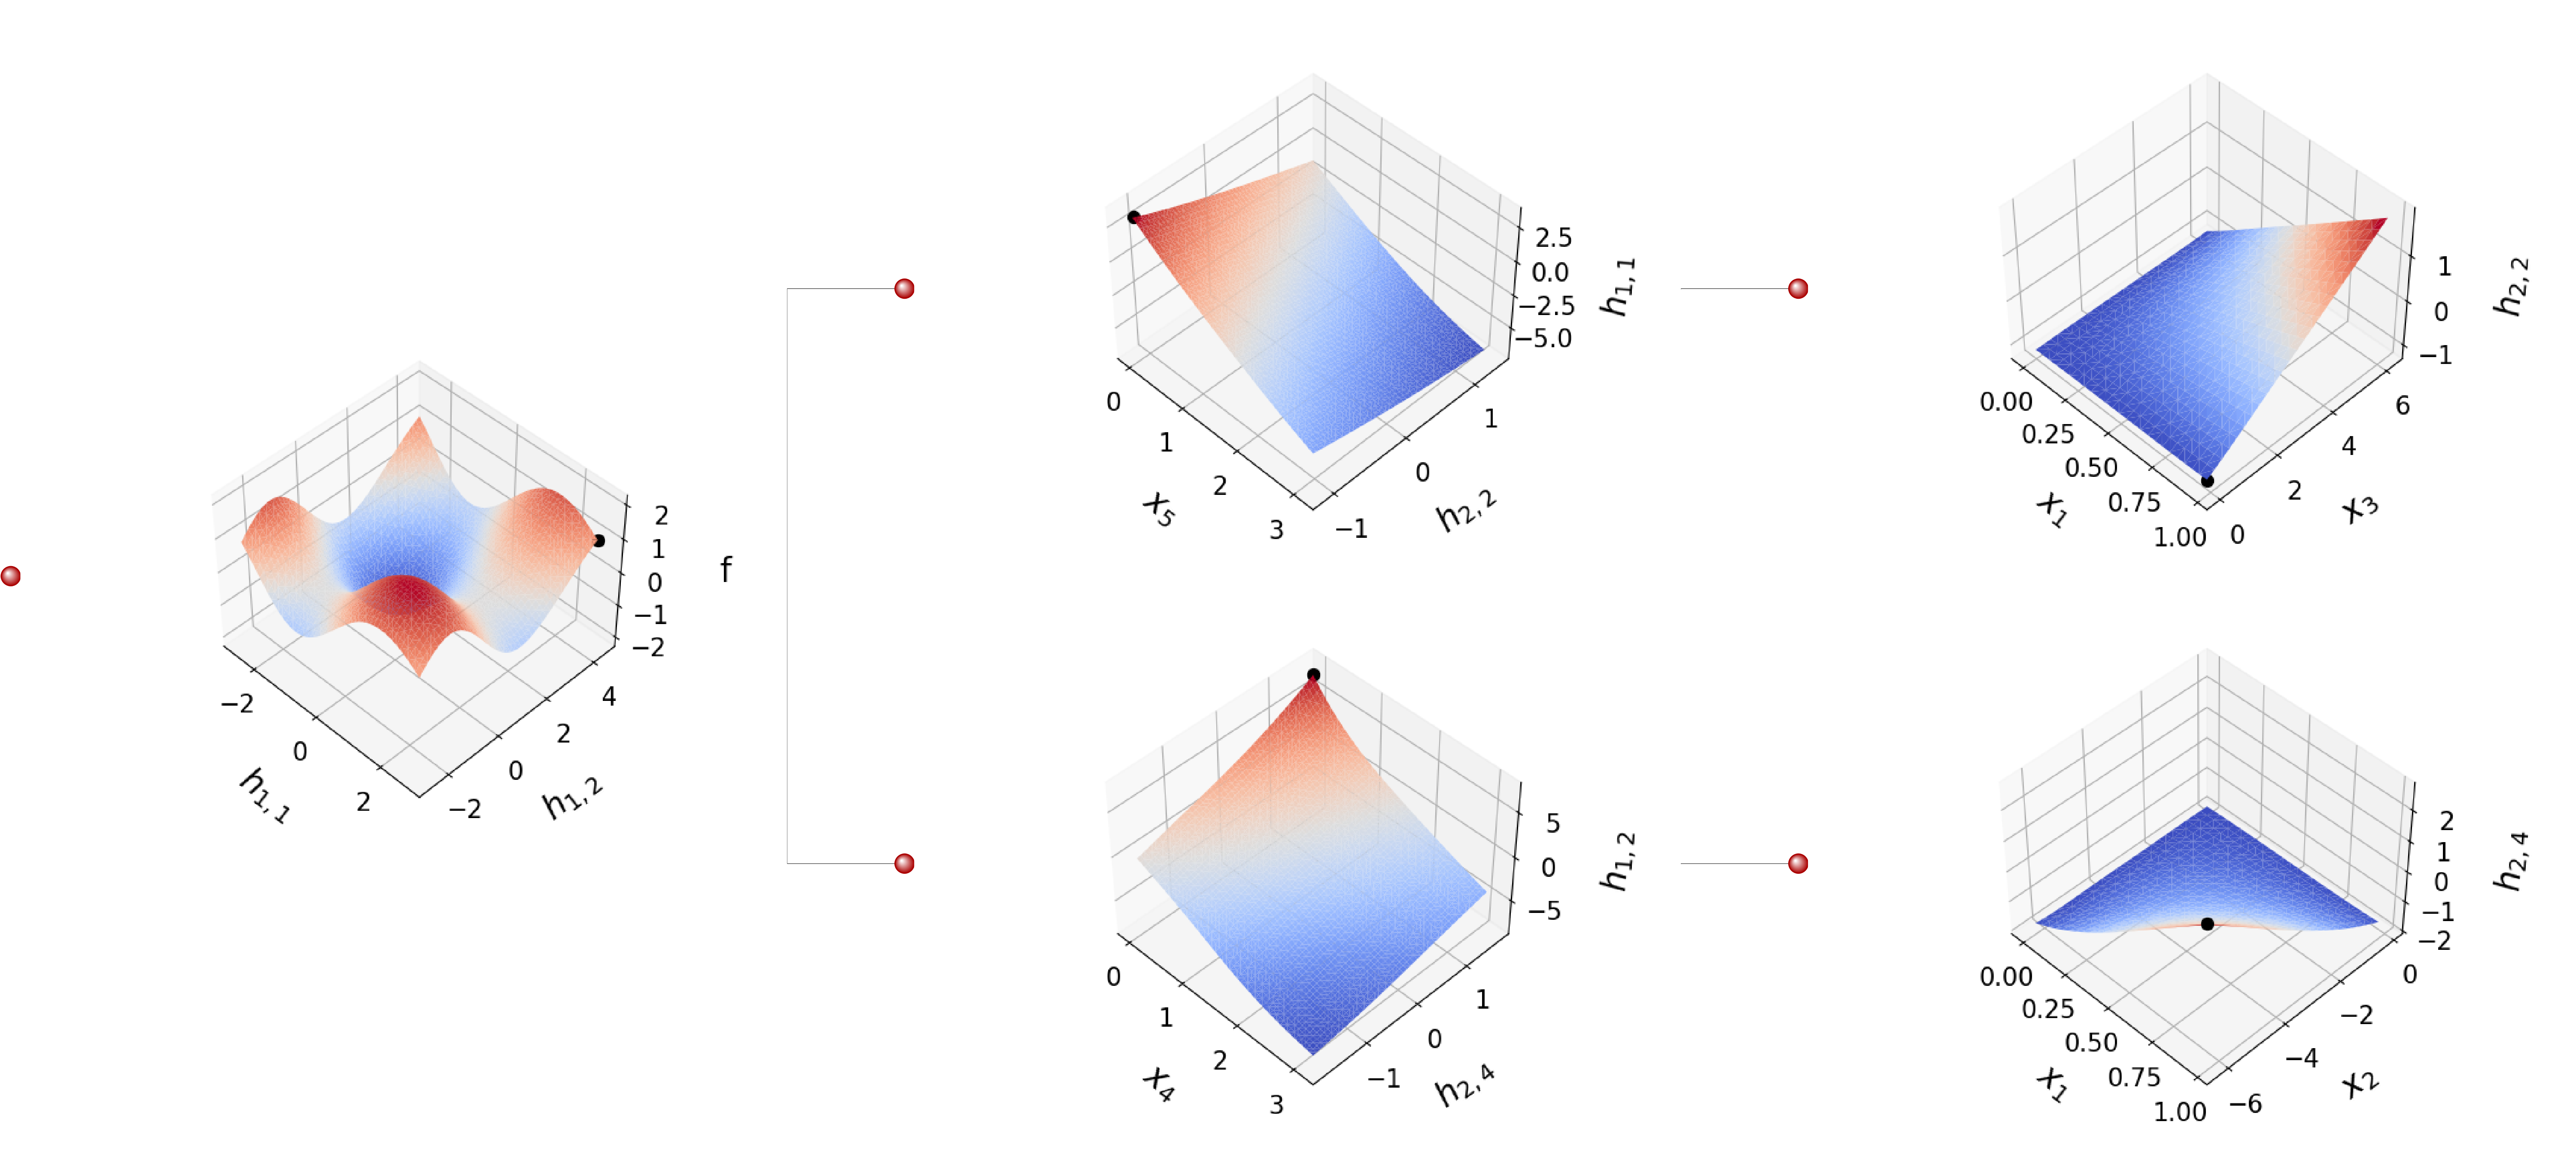

In [191]:
display(slider_box)
t, ts = treePlot(index_root, tree_data, fig_name, node_names)
t.render(file_name = "%%inline", w=6000, tree_style = ts)